In [1]:
%load_ext autoreload
%autoreload 2

In [13]:
from tqdm import tqdm

from BondingCurveNexus import single_sim
from BondingCurveNexus.sys_class import NexusSystem
from BondingCurveNexus.param_functions import open_liq, wnxm_movement_per_eth

100%|████████████████████████████████████████████████████████████████████████████████████████████| 730/730 [00:00<00:00, 1167.68it/s]


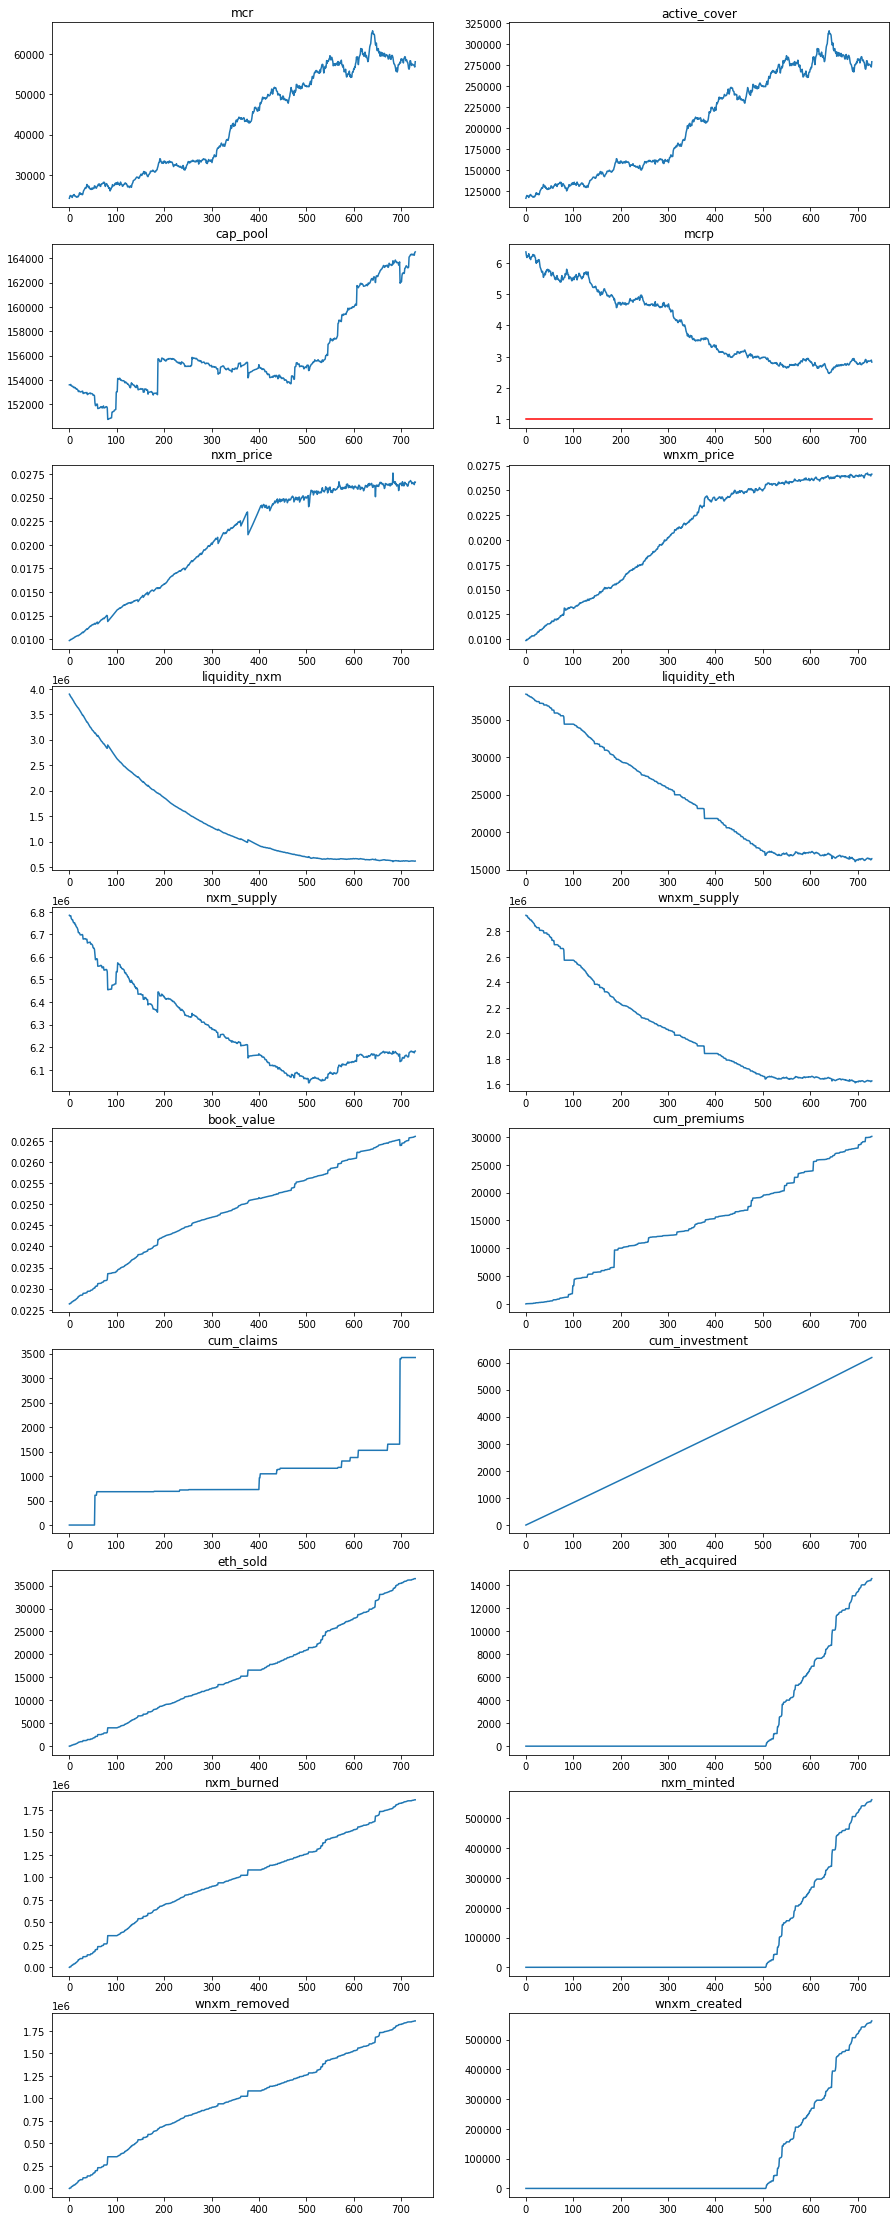

In [32]:
%run ../BondingCurveNexus/single_sim.py

In [26]:
num_sims = 10_000
sims = [NexusSystem(liquidity_eth=open_liq(0.5), wnxm_move_size=wnxm_movement_per_eth(two_perc_liq_usd=500_000))
        for x in range(num_sims)]

In [27]:
model_days = 730

for sim in tqdm(sims):
    for i in range(model_days):
        sim.cover_amount_shift()

100%|████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:03<00:00, 2647.95it/s]


In [28]:
cover_range = [sim.act_cover for sim in sims]

In [31]:
pd.DataFrame(cover_range).median()

0    207082.938914
dtype: float64